# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### In OpenLibrary's All time trending. What is the chance that a new book will have more than the average amount of logs a book should have?

# My Answer

In [28]:
import requests
from bs4 import BeautifulSoup
import random
import pandas as pd
import seaborn as sns
import random

***These are libraries they make my code to actually function.***

In [2]:
url = "https://openlibrary.org/trending/forever?page="+str(i)
response =requests.get(url)
html_con = response.text
soup = BeautifulSoup(html_con, 'html.parser')

***This code takes info from the url which allows me to start scraping it.***

In [58]:
Books ={"Book":[]}
Authors = {"Author":[]}
years = {"Year":[]}
logs ={"Logs":[]}
i=1
while i <= 10:
    url = "https://openlibrary.org/trending/forever?page="+str(i)
    response =requests.get(url)
    html_con = response.text
    soup = BeautifulSoup(html_con, 'html.parser')
    uls = soup.find_all("h3",{"class":"booktitle"})
    for a in uls:
        Book = a.get_text()
        Book = Book.strip()
        Books["Book"].append(Book)
    auths = soup.find_all("span",{"class":"bookauthor"})
    for a in auths:
        auth = a.get_text()
        auth = auth.strip()
        result = auth.split("by")
        just_auth = result[1]
        Authors["Author"].append(just_auth)
    year = soup.find_all("span",{"class":"resultDetails"})
    for a in year:
        year = a.get_text()
        year = year.strip()
        result = year.split()
        just_year = result[3]
        just_year = int(just_year)
        years["Year"].append(just_year)
        log = soup.find_all("div", {"class":"details"})
    for a in log:
        log = a.get_text()
        log = log.strip()
        result = log.split("Logged")
        result = result[1].split("times")
        result = result[0]
        result = int(result)
        logs["Logs"].append(result)
    i +=1

***This code scraped the page source of the url to give me the Book name, Authors, Year it was published and the amount of times it has been logged (checked out).***

In [59]:
df = pd.DataFrame(Books)

In [60]:
df2 = pd.DataFrame(Authors)

In [61]:
df3 = pd.DataFrame(years)

In [62]:
df4 = pd.DataFrame(logs)

***Im putting all of them into dataframes so I can start merging them into one big dataframe.***

In [63]:
All = pd.merge(df, df2, left_index=True, right_index=True)

In [64]:
All = pd.merge(All, df3, left_index=True, right_index=True)

In [65]:
All = pd.merge(All, df4, left_index=True, right_index=True)

In [66]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Book    199 non-null    object
 1   Author  199 non-null    object
 2   Year    199 non-null    int64 
 3   Logs    199 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


***This is me merging all the data one by one into one dataframe. I also ran the dataframe to see if it looked readable.***

In [67]:
All.head(20)

,Book,Author,Year,Logs
0,Atomic Habits,James Clear,2016,41326
1,It Ends With Us,Colleen Hoover,2012,40613
2,The 48 Laws of Power,Robert Greene and Joost Elffers,1998,35121
3,The Subtle Art of Not Giving a F*ck,Mark Manson,2016,30237
4,Um casamento arranjado,Zana Kheiron,2019,23281
5,"Rich Dad, Poor Dad",Robert T. Kiyosaki and Sharon L. Lechter,1990,23044
6,Harry Potter and the Philosopher's Stone,J. K. Rowling,1997,16039
7,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,2019,15569
8,It Starts with Us,Colleen Hoover,2022,15560
9,Think and Grow Rich,Napoleon Hill,1937,11776


# P(Book) = 0.22

***This means that a new book has an 22% chance to be higher than the average.***

Emp Probability: 0.212
Average of Logs: 3882.527638190955


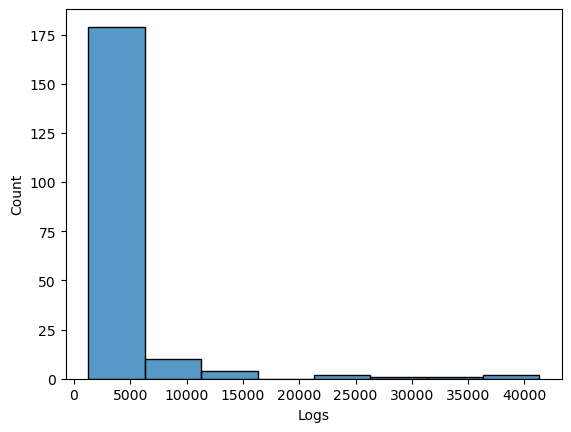

In [75]:
rounds = 0 
book = 0
trial = 1000
while rounds<trial:
        num = random.randint(0, 198)
        if All["Logs"][num] >= 3882:
                book += 1
        rounds += 1
    
print("Emp Probability:", str((book/trial)))
sns.histplot(data=All, x="Logs",bins=8)
print("Average of Logs:",All["Logs"].mean())